# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [3]:
import pandas as pd
from pathlib import Path

DATA_PATH = Path("01-01-2021.csv")
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv"
df = pd.read_csv(url)
print("Rows, Columns:", df.shape)
display(df.head())
df.columns

Rows, Columns: (4011, 14)


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

#### Display the top 5 rows in the data

In [4]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


#### Show the information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


#### Show the sum of missing values of features in the dataset

In [6]:
df.isna().sum()

FIPS                   746
Admin2                 741
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [7]:
confirmed_by_country = (
    df.groupby("Country_Region", as_index=False)["Confirmed"]
      .sum()
)

confirmed_by_country.sort_values("Confirmed", ascending=False)


,Country_Region,Confirmed
185,US,20397401
80,India,10305788
24,Brazil,7703971
146,Russia,3153960
63,France,2697014
...,...,...
93,"Korea, North",0
125,Nauru,0
196,Winter Olympics 2022,0
169,Summer Olympics 2020,0


#### Show the number of Deaths by Country

In [8]:
deaths_by_country = (
    df.groupby("Country_Region", as_index=False)["Deaths"]
      .sum()
)

deaths_by_country.sort_values("Deaths", ascending=False)

,Country_Region,Deaths
185,US,352844
24,Brazil,195541
80,India,149218
117,Mexico,126507
189,United Kingdom,95917
...,...,...
98,Laos,0
169,Summer Olympics 2020,0
157,Seychelles,0
136,Palau,0


#### Show the number of Recovered cases by Country

In [9]:
recovered_by_country = (
    df.groupby("Country_Region", as_index=False)["Recovered"]
      .sum()
)

recovered_by_country.sort_values("Recovered", ascending=False)

,Country_Region,Recovered
80,India,9929568
24,Brazil,6855372
146,Russia,2553467
183,Turkey,2114760
38,Colombia,1520548
...,...,...
171,Sweden,0
185,US,0
184,Tuvalu,0
17,Belgium,0


#### Show the number of Active Cases by Country

In [10]:
active_by_country = (
    df.groupby("Country_Region", as_index=False)["Active"]
      .sum()
)

active_by_country.sort_values("Active", ascending=False)

,Country_Region,Active
185,US,19978335
189,United Kingdom,2469774
63,France,2431301
166,Spain,1727052
117,Mexico,1310678
...,...,...
184,Tuvalu,0
107,MS Zaandam,0
180,Tonga,0
169,Summer Olympics 2020,0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [11]:
latest_countrywise = (
    df.groupby("Country_Region", as_index=False)[["Confirmed", "Deaths", "Recovered", "Active"]]
      .sum()
)

latest_countrywise.sort_values("Confirmed", ascending=False)

,Country_Region,Confirmed,Deaths,Recovered,Active
185,US,20397401,352844,0,19978335
80,India,10305788,149218,9929568,273109
24,Brazil,7703971,195541,6855372,649795
146,Russia,3153960,56798,2553467,543695
63,France,2697014,64891,200822,2431301
...,...,...,...,...,...
93,"Korea, North",0,0,0,0
125,Nauru,0,0,0,0
196,Winter Olympics 2022,0,0,0,0
169,Summer Olympics 2020,0,0,0,0


### Question 3

### Show the countries with no recovered cases

In [12]:
no_recovered = latest_countrywise.loc[latest_countrywise["Recovered"] == 0, ["Country_Region", "Recovered"]]
no_recovered

,Country_Region,Recovered
5,Antarctica,0
17,Belgium,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
156,Serbia,0
169,Summer Olympics 2020,0
171,Sweden,0
180,Tonga,0


#### Show the countries with no confirmed cases

In [13]:
no_confirmed = latest_countrywise.loc[latest_countrywise["Confirmed"] == 0, ["Country_Region", "Confirmed"]]
no_confirmed

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
169,Summer Olympics 2020,0
180,Tonga,0
184,Tuvalu,0
196,Winter Olympics 2022,0


#### Show the countries with no deaths

In [14]:
no_deaths = latest_countrywise.loc[latest_countrywise["Deaths"] == 0, ["Country_Region", "Deaths"]]
no_deaths

,Country_Region,Deaths
5,Antarctica,0
20,Bhutan,0
31,Cambodia,0
51,Dominica,0
70,Grenada,0
76,Holy See,0
92,Kiribati,0
93,"Korea, North",0
98,Laos,0
114,Marshall Islands,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [16]:
country_stats = (
    df.groupby("Country_Region")
      .agg(
          Last_Update=("Last_Update", "max"),
          Confirmed=("Confirmed", "sum"),
          Deaths=("Deaths", "sum"),
          Recovered=("Recovered", "sum"),
          Active=("Active", "sum"),
      )
)

top10_confirmed = country_stats.sort_values("Confirmed", ascending=False).head(10)
top10_confirmed[["Last_Update", "Confirmed", "Deaths", "Recovered"]]

,Last_Update,Confirmed,Deaths,Recovered
Country_Region,,,,
US,2021-04-02 15:13:53,20397401,352844,0
India,2021-01-02 05:22:33,10305788,149218,9929568
Brazil,2021-01-02 05:22:33,7703971,195541,6855372
Russia,2021-01-02 05:22:33,3153960,56798,2553467
France,2021-01-02 05:22:33,2697014,64891,200822
United Kingdom,2021-01-02 05:22:33,2549671,95917,5682
Turkey,2021-01-02 05:22:33,2220855,21093,2114760
Italy,2021-01-02 05:22:33,2129376,74621,1479988
Spain,2021-01-02 05:22:33,1928265,50837,150376


#### Show the Top 10 Countries with Active cases

In [17]:
top10_active = country_stats.sort_values("Active", ascending=False).head(10)
top10_active[["Last_Update", "Confirmed", "Deaths", "Recovered", "Active"]]

,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
US,2021-04-02 15:13:53,20397401,352844,0,19978335
United Kingdom,2021-01-02 05:22:33,2549671,95917,5682,2469774
France,2021-01-02 05:22:33,2697014,64891,200822,2431301
Spain,2021-01-02 05:22:33,1928265,50837,150376,1727052
Mexico,2021-01-02 05:22:33,1437185,126507,1083768,1310678
Peru,2021-01-02 05:22:33,1015137,93231,951318,921906
Netherlands,2021-01-02 05:22:33,816616,11624,9651,795341
Brazil,2021-01-02 05:22:33,7703971,195541,6855372,649795
Belgium,2021-01-02 05:22:33,648289,19581,0,637588


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [19]:
import matplotlib.pyplot as plt

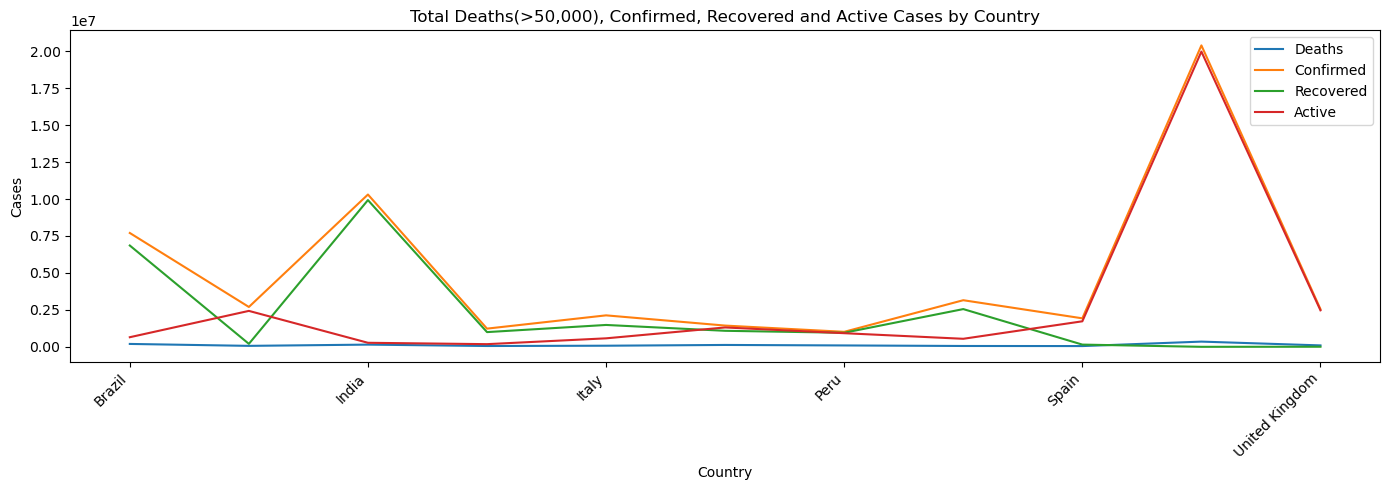

In [20]:
high_death_countries = country_stats[country_stats["Deaths"] > 50000]

ax = high_death_countries[["Deaths", "Confirmed", "Recovered", "Active"]].plot(
    kind="line", figsize=(14, 5), title="Total Deaths(>50,000), Confirmed, Recovered and Active Cases by Country"
)
ax.set_xlabel("Country")
ax.set_ylabel("Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [22]:
import plotly.express as px

In [23]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [24]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

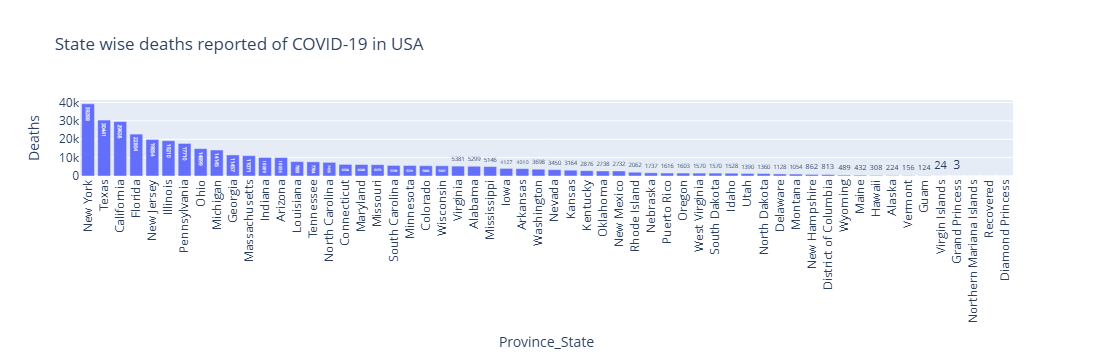

In [25]:
usa = covid_data[covid_data["Country_Region"] == "US"]
usa_state_deaths = (
    usa.groupby("Province_State", as_index=False)["Deaths"]
       .sum()
       .sort_values("Deaths", ascending=False)
)
fig = px.bar(
    usa_state_deaths,
    x="Province_State",
    y="Deaths",
    title="State wise deaths reported of COVID-19 in USA",
    text="Deaths"
)

fig.update_layout(xaxis_tickangle=-90)
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

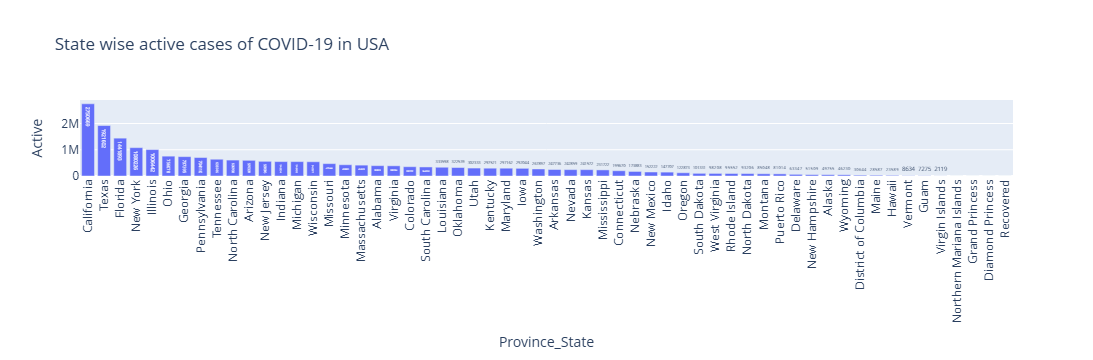

In [26]:
usa = covid_data[covid_data["Country_Region"] == "US"]

usa_state_active = (
    usa.groupby("Province_State", as_index=False)["Active"]
       .sum()
       .sort_values("Active", ascending=False)
)


fig = px.bar(
    usa_state_active,
    x="Province_State",
    y="Active",
    title="State wise active cases of COVID-19 in USA",
    text="Active"
)

fig.update_layout(xaxis_tickangle=-90)
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

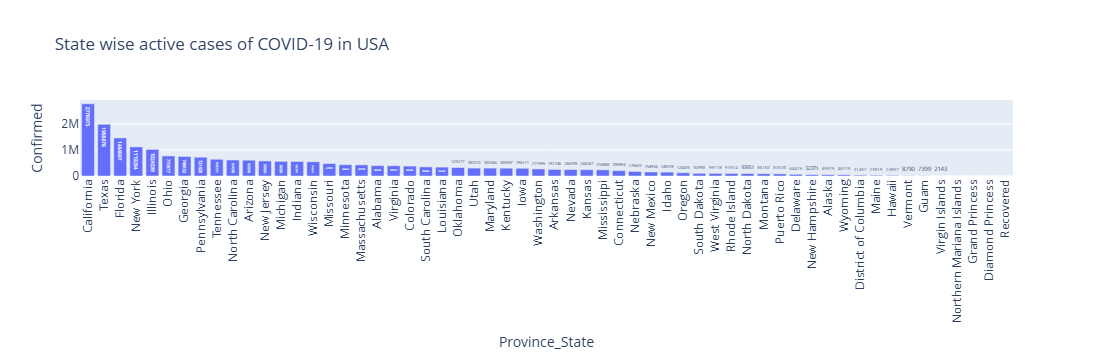

In [29]:
usa = covid_data[covid_data["Country_Region"] == "US"]

usa_state_active = (
    usa.groupby("Province_State", as_index=False)["Confirmed"]
       .sum()
       .sort_values("Confirmed", ascending=False)
)


fig = px.bar(
    usa_state_active,
    x="Province_State",
    y="Confirmed",
    title="State wise active cases of COVID-19 in USA",
    text="Confirmed"
)

fig.update_layout(xaxis_tickangle=-90)
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [30]:
import plotly.express as px
import plotly.io as pio

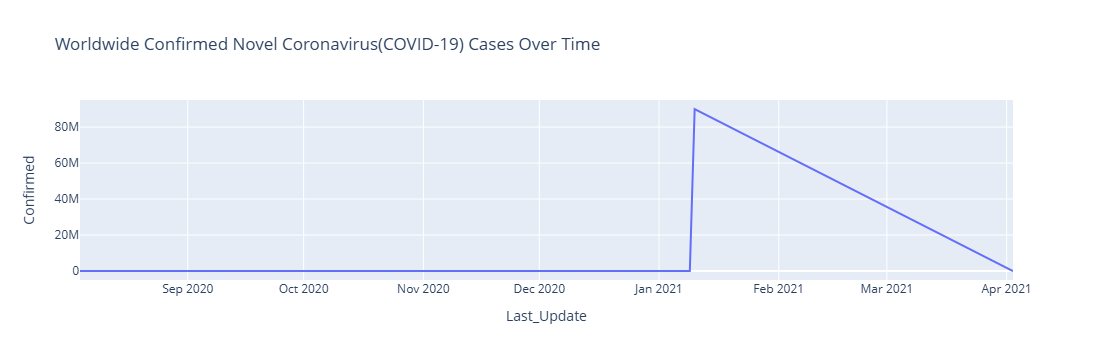

In [31]:
temp = covid_data.copy()
temp["Last_Update"] = pd.to_datetime(temp["Last_Update"])


world_confirmed_time = (
    temp.groupby("Last_Update", as_index=False)[["Confirmed"]]
        .sum()
        .sort_values("Last_Update")
)

fig = px.line(
    world_confirmed_time,
    x="Last_Update",
    y="Confirmed",
    title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time"
)

fig.show()